Exercise Sheet 1 **McCulloch-Pitts Neurons and Perceptron Learning**

**1. McCulloch-Pits neuron**

In [1]:
#1a
import numpy as np
import matplotlib.pyplot as plt

def sign(a): #defining the sign transfer function
    if a >= 0:
        return 1
    if a < 0:
        return 0
    
sign4Arr = np.vectorize(sign)

def MPn(x,w): #defining McCulloch Pitts perception
    z = np.matmul(x,w)
    y = sign4Arr(z)
    return y

In [2]:
#1b
w = np.array([3,2,2])

for i in [-1,1]: #for all possible combinations of two binary vectors...
    for j in [-1,1]:
        x = np.array([-1,i,j])
        AND = MPn(x,w) 
        print(
            'Awesome! When x1 is %d and x2 is %d, the output of your \
            neuron is %d' %(i,j,AND)) #testing it works

Awesome! When x1 is -1 and x2 is -1, the output of your             neuron is 0
Awesome! When x1 is -1 and x2 is 1, the output of your             neuron is 0
Awesome! When x1 is 1 and x2 is -1, the output of your             neuron is 0
Awesome! When x1 is 1 and x2 is 1, the output of your             neuron is 1


**2. Activation functions**

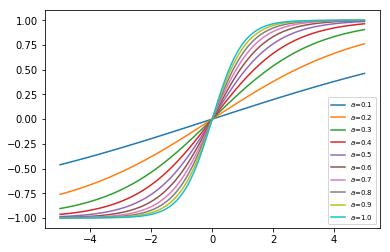

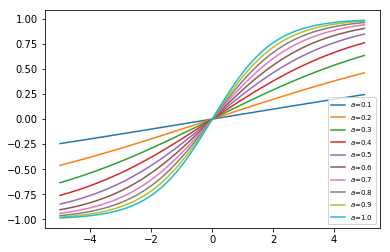

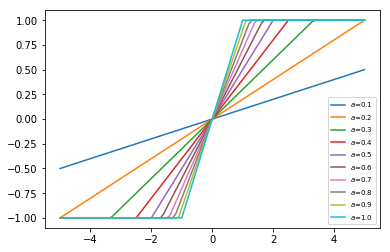

In [3]:
#2a
def sigmoid(a,x): #define sigmoid function
    y = 2/(1+np.exp(-a*x))-1
    return y

def pieceLin(a,x): #define piecewise transfer function
    if x >= 1/a:
        return 1.0
    elif x <= -1/a:
        return -1.0
    else:
        return x*a
    
pieceArr = np.vectorize(pieceLin) #creating piecewise f to take array

x = np.linspace(-5,5,101) 

plt.figure() #let's plot! first tanh
for a in np.linspace(0.1,1,10):
    plt.plot(x,np.tanh(a*x),label='$a$={:.1f}'.format(a))
plt.legend(loc=4, fontsize = 7)
    
plt.figure() #next, sigmoid!
for a in np.linspace(0.1,1,10):
    plt.plot(x,sigmoid(a,x),label='$a$={:.1f}'.format(a))
plt.legend(loc=4, fontsize = 7)

plt.figure() #Finally, our beauuuuutiful piecewise
for a in np.linspace(0.1,1,10):
    plt.plot(x,pieceArr(a,x),label='$a$={:.1f}'.format(a))
plt.legend(loc=4, fontsize = 7)

The parameter $a$ is a measure of how steep the transfer function is around x = 0, so one could choose a very large $a$, which would render an ouput very close to h(x) for all three functions.

**3. Rosenblatt's Perceptron**

In [4]:
#Trying something new -- a neuron class
import numpy as np

class RosenblattPerceptron(object):
    def __init__(self):
        self.inputsize = 2 #setting constant parameters
        self.outputsize = 1
        self.observsize = 1000
        self.a = 1
        self.eta = .03
        self.XVecs = np.random.normal(0,1,(self.observsize,self.inputsize))
        self.Bias = np.ones(self.observsize,)*-1 #setting bias term
    
        #initializing weights 
        self.W = np.random.randn(self.observsize,(self.inputsize+1))
        
        #intializing x's, which we'll pass to everything
        #creates set of bias + x vectors
        self.trainingset = np.insert(self.XVecs,0,self.Bias,axis=1)
        
    def dx(self, x): #creates matrix of our desired response
        self.desiredR = np.zeros(shape=(self.observsize,))
        for index, b in np.ndenumerate(x):
            if x[index[0],0]>= .5 - x[index[0],1]: #hardcoding # of inputs
                self.desiredR[index[0]] = 1
            else:
                self.desiredR[index[0]] = -1
        return self.desiredR
        
    def sigmoid(self, x): #defining sigmoid inside
        self.y = 2/(1+np.exp(-self.a*x))-1
        return self.y
    
    def forwardprop(self,x): #defining forward propagation
        #element wise product of w transpose
        self.input = np.multiply(x, self.W) 
        #passing input through transfer function
        self.activation = self.sigmoid(self.input)
        output = self.activation.sum(axis=1) #summing over rows
        return output
    
    #Stacking all above functions to update weights in while loop
    def weightupdate(self, x): #should be passed the training data
        self.NW = self.W.T
        self.OW = np.array((1,1))
        self.iterations = 0
        try:
            while np.array_equal(self.NW.round(decimals=2), \
                        self.OW.round(decimals=2)) == False:
                #testing all # elements for equality. If false, continues.
                self.OW = self.NW
                #(1000,3) is the desired shape, broadcasting here
                self.NW = self.OW + ((self.eta*(self.dx(x) - \
                                    self.forwardprop(x))*x.T)) 
                self.iterations += 1
                if self.iterations > 3000: #putting a lid on the iterations
                    break
        except KeyboardInterrupt: #covering our asses against infinite loops
             print('interrupted!')
        print('The update loop was stopped after',self.iterations,'iterations!')
        return self.NW

In [5]:
NN = RosenblattPerceptron() #i class

In [6]:
#3a
t = NN.trainingset #printing our prepared training st
print(t)

[[-1.          0.12303362  0.41997615]
 [-1.         -0.79093796  1.5348674 ]
 [-1.         -1.05880727  0.67858595]
 ...
 [-1.         -0.27598202  1.58342023]
 [-1.         -1.24293493  0.47415544]
 [-1.         -0.71667813  1.64846098]]


In [7]:
#3b
wu1 = NN.weightupdate(t) #printing our updated weights
print(wu1)

The update loop was stopped after 3001 iterations!
[[ 163.28809327   65.53242177  -15.63237257 ...   54.77368058
    52.92980209   68.07743511]
 [ -20.78511355   52.70945762  -14.119836   ...   15.46054687
    69.15765359   48.78969205]
 [ -69.09255735  -98.56467834    9.02955404 ...  -86.87019642
   -26.08230878 -110.67199825]]


A "small" step for eta should be proportional to the size of the activation. Despite this, my weights are floats and there will never be a point where the weights don't change. So, we truncate the weights to 2 decimal places  "no weight changes". With a large eta, close to 1, the weight update will cause our error function to grow rapidly unbounded. It still grow unbounded with a small weight, but at a slower pace.

In [8]:
#3c
NN = RosenblattPerceptron() #reseting randomized trainingset and weights
nt = NN.trainingset #our new training set
print(nt)

[[-1.          1.0283633   1.08331795]
 [-1.          0.15377974 -1.30670348]
 [-1.         -0.24062119  0.04355484]
 ...
 [-1.         -0.59062896  1.04696133]
 [-1.         -0.59831416  0.62848619]
 [-1.          0.90312434  0.16890121]]


In [9]:
wu2 = NN.weightupdate(nt) #testing loop once more
print(wu2)

The update loop was stopped after 3001 iterations!
[[  48.6496732   179.57307433   72.9083143  ...  213.18875414
    24.97668381   79.39293863]
 [ -49.64849169  -27.19900538   19.29015426 ...  124.85353426
    14.56867791  -72.0047346 ]
 [ -52.92353582  234.30248783   -1.3437353  ... -223.54763479
   -14.31433359  -12.95908398]]


<function matplotlib.pyplot.show(*args, **kw)>

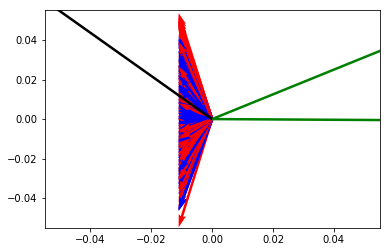

In [10]:
#3d
import matplotlib.pyplot as plt 

nw = NN.NW #the last updated weight, which didn't converge

origin = [0], [0] # origin point

#plotting our vectors
plt.quiver(*origin, nt[:,0], nt[:,1], color=['r','b'], scale = 10)
plt.quiver(*origin, nw[:,1], nw[:,2], color=['g','k'], scale = 10)
plt.show

The weight vector is far from optimal.

**4. Linear Separability**

In [11]:
import numpy as np


#creating class for a XOR perceptron
class XOR(object):
    def __init__(self):
        self.inputsize = 2 #setting constant parameters
        self.outputsize = 1
        self.observsize = 4
        self.a = 1
        self.eta = .2
        self.XVecs = np.array(([0,0],[0,1],[1,0],[1,1]))
        self.Bias = np.ones(self.observsize,)*-1 #setting bias term
        
        #initializing random weights 
        self.W = np.random.randn(self.observsize,(self.inputsize+1))
        
        #intializing x's, which we'll pass to everything, and desired response
        #creates set of bias + x vectors
        self.trainingset = np.insert(self.XVecs,0,self.Bias,axis=1) 
        self.desiredR = np.array ([0,1,1,0])
        
    def sigmoid(self, x): 
        self.y = 2/(1+np.exp(-self.a*x))-1
        return self.y
    
    def forwardprop(self,x):
        #element wise product of w transpose
        self.input = np.multiply(x, self.W)
        #passing through transfer function
        self.activation = self.sigmoid(self.input)
        output = self.activation.sum(axis=1) #summing over rows
        return output
    
    #Stacking all above functions...
    def weightupdate(self, x): #should be passed the training data
        self.NW = self.W.T
        self.OW = np.array((1,1))
        self.iterations = 0
        try:
             #testing all elements for equality. If false, continues.
            while np.array_equal(self.NW.round(decimals=2), \
                                 self.OW.round(decimals=2)) == False:
                self.OW = self.NW
                self.NW = self.OW + (self.eta*(self.desiredR - \
                                               self.forwardprop(self.trainingset)).T*x.T) #(4,2) is the desired shape, broadcasting here
                self.iterations += 1
                if self.iterations > 10000: #keeping track of our weights
                    break
        except KeyboardInterrupt: #covering our asses against infinite loops
             print('interrupted!')
        print('The update loop was stopped after',self.iterations,'iterations!')
        return self.NW

In [12]:
xor = XOR() #intializing XOR perceptron

In [13]:
#4b
ts = xor.trainingset #training xor perceptron
xor.weightupdate(ts)

The update loop was stopped after 10001 iterations!


array([[ 5.61801062e+02, -6.54406426e+02, -1.91172534e+03,
        -8.03273119e+02],
       [ 1.37424908e+00, -1.03894243e+00,  1.91323568e+03,
         8.04382052e+02],
       [-1.10281109e+00,  6.54438420e+02,  2.89021797e-01,
         8.03569727e+02]])

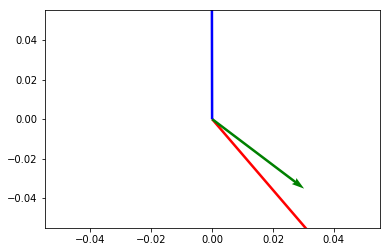

In [14]:
#4c

#plotting the vectors
euc = xor.NW

origin = [0], [0] # origin point

plt.quiver(*origin, euc[:,0], euc[:,1], color=['r','g','b'],scale = 5)

XOR is not linearly separable because a perceptron with just one layer cannot plot the function. It requires at least two layers, because it is the combinatior of NOR and AND. Out of 16 boolean logic function, there are 14 that a single-layer perceptron can be trained on and 2 that it cannot be: XOR and not XOR.